In [1]:
import sys
import datetime as dt
import pandas as pd
import numpy as np
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')
from envir import config

/home/cusp/yg833/.conda/envs/birdsVE3.7/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(config.dataFol+'all_cleaned_wsp_sonyc_birds.csv')

In [3]:
df.shape

(321219, 19)

In [10]:
# split into year, month, day, hour
df['timestamp'] = pd.to_datetime(df.timestamp)
df['year'] = pd.DatetimeIndex(df.timestamp).year
df['month'] = pd.DatetimeIndex(df.timestamp).month
df['day'] = pd.DatetimeIndex(df.timestamp).day
df['hour'] = pd.DatetimeIndex(df.timestamp).hour

df['localtime'] = pd.to_datetime(df.timestamp).dt.tz_localize('UTC').dt.tz_convert('America/New_York')
df['localyear'] = pd.DatetimeIndex(df.localtime).year
df['localmonth'] = pd.DatetimeIndex(df.localtime).month
df['localday'] = pd.DatetimeIndex(df.localtime).day
df['localhour'] = pd.DatetimeIndex(df.localtime).hour

In [11]:
df.groupby(['sonyc_sensor_name', 'month']).mean()

,,dBAS_lin_mean,count_of_positive_predictions,pct_positive_predictions,avg_mtr_#/km/h,avg_mt_#/km,avg_height_m,temp_celcius,dewp_celcius,rh_percentage,wind_dir,...,visibility_miles,gust_mph,peak_wind_gust_mph,year,day,hour,localyear,localmonth,localday,localhour
sonyc_sensor_name,month,,,,,,,,,,,,,,,,,,,,,
19 Washington Square North,3,60.686278,0.299377,0.101487,63.196222,54472.775911,355.596191,3.617284,-3.886759,61.473586,217.851060,...,9.407347,26.009308,32.950496,2018.705410,12.850269,7.687164,2018.705410,2.991540,12.776110,10.884602
4 Washington Square North,3,58.767286,0.314199,0.096149,68.275413,57668.350953,354.651886,3.958465,-2.941035,63.983586,216.802949,...,9.330969,26.009021,33.050465,2018.892578,13.136568,7.713630,2018.892578,2.986441,13.208064,10.886376
Juan Carlos,3,59.800366,0.420213,0.132092,62.793345,55186.810043,357.697905,3.652633,-3.900639,61.281854,219.461244,...,9.420474,26.136411,33.024920,2018.719568,12.982620,7.664259,2018.719568,2.991510,12.906500,10.936490
Kimmel Center,3,58.726316,0.265962,0.079753,70.408539,53634.664350,337.627432,4.355838,-2.877626,62.796824,211.356859,...,9.446115,25.249050,32.635205,2019.079651,13.394416,7.906544,2019.079651,2.988289,13.425885,10.873408
Shimkin Reading Room,3,63.494637,0.091494,0.044876,55.316421,56426.175405,373.043173,3.508333,-4.161846,60.762012,221.037378,...,9.387364,26.506203,33.441432,2018.507859,11.613129,7.340094,2018.507859,2.984402,11.717378,11.015121


In [22]:
df.columns

Index(['timestamp', 'sonyc_sensor_id', 'sonyc_sensor_name', 'dBAS_lin_mean',
       'count_of_positive_predictions', 'pct_positive_predictions',
       'avg_mtr_#/km/h', 'avg_mt_#/km', 'avg_height_m', 'temp_celcius',
       'dewp_celcius', 'rh_percentage', 'wind_dir', 'wind_speed_mph',
       'sea_level_pressure_mb', 'precipitation_mm', 'visibility_miles',
       'gust_mph', 'peak_wind_gust_mph', 'year', 'month', 'day', 'hour',
       'localtime', 'localyear', 'localmonth', 'localday', 'localhour'],
      dtype='object')

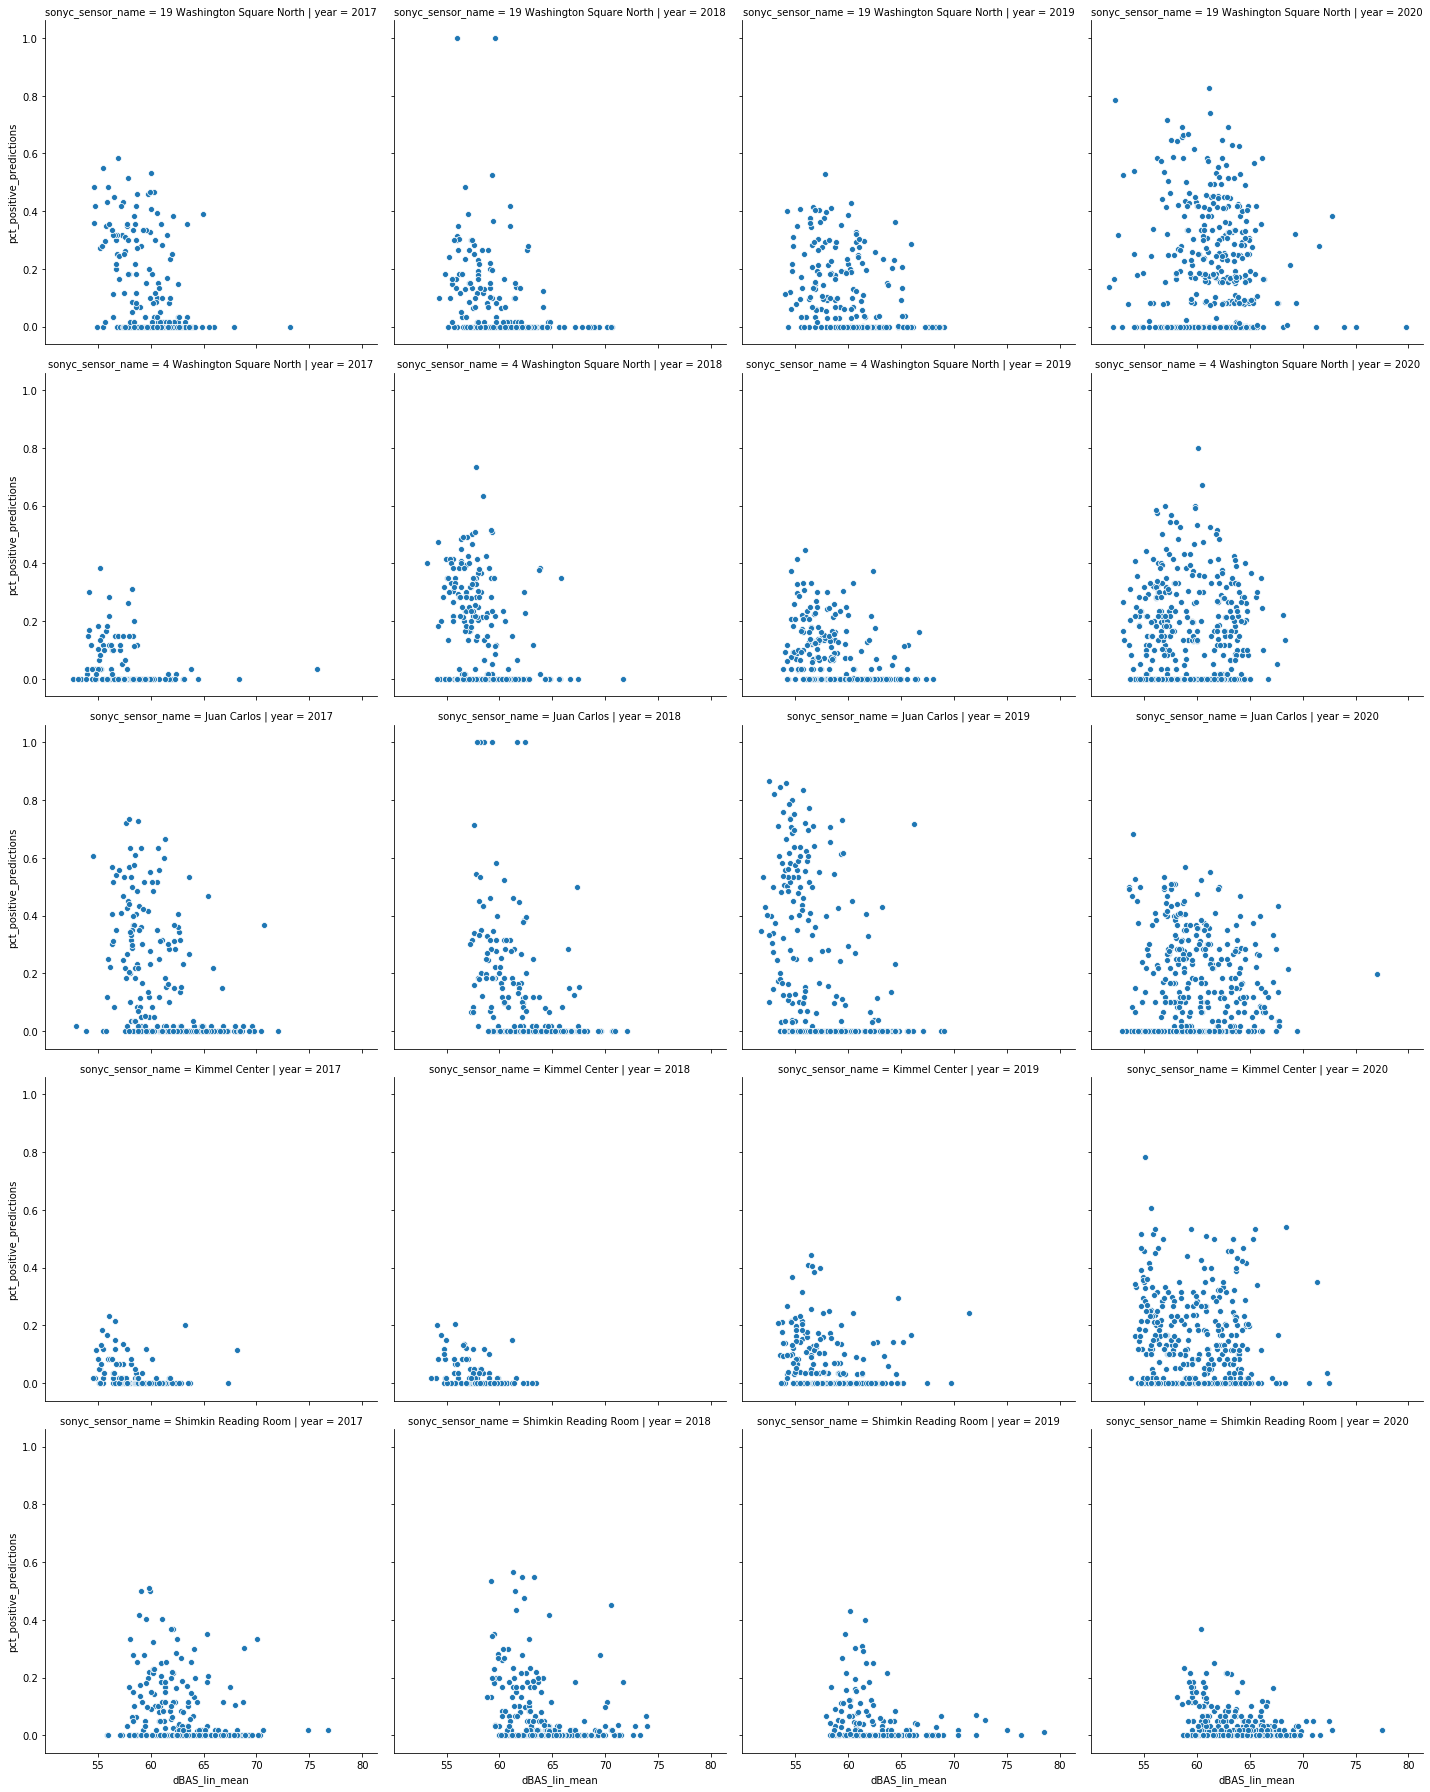

In [12]:
sns.relplot(x="dBAS_lin_mean", y="pct_positive_predictions",
            col="year", row="sonyc_sensor_name",
            data=df[['sonyc_sensor_name', 'year', 'month', 'day', 'hour',
                     'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'year', 'month', 'day', 'hour']).mean().reset_index())

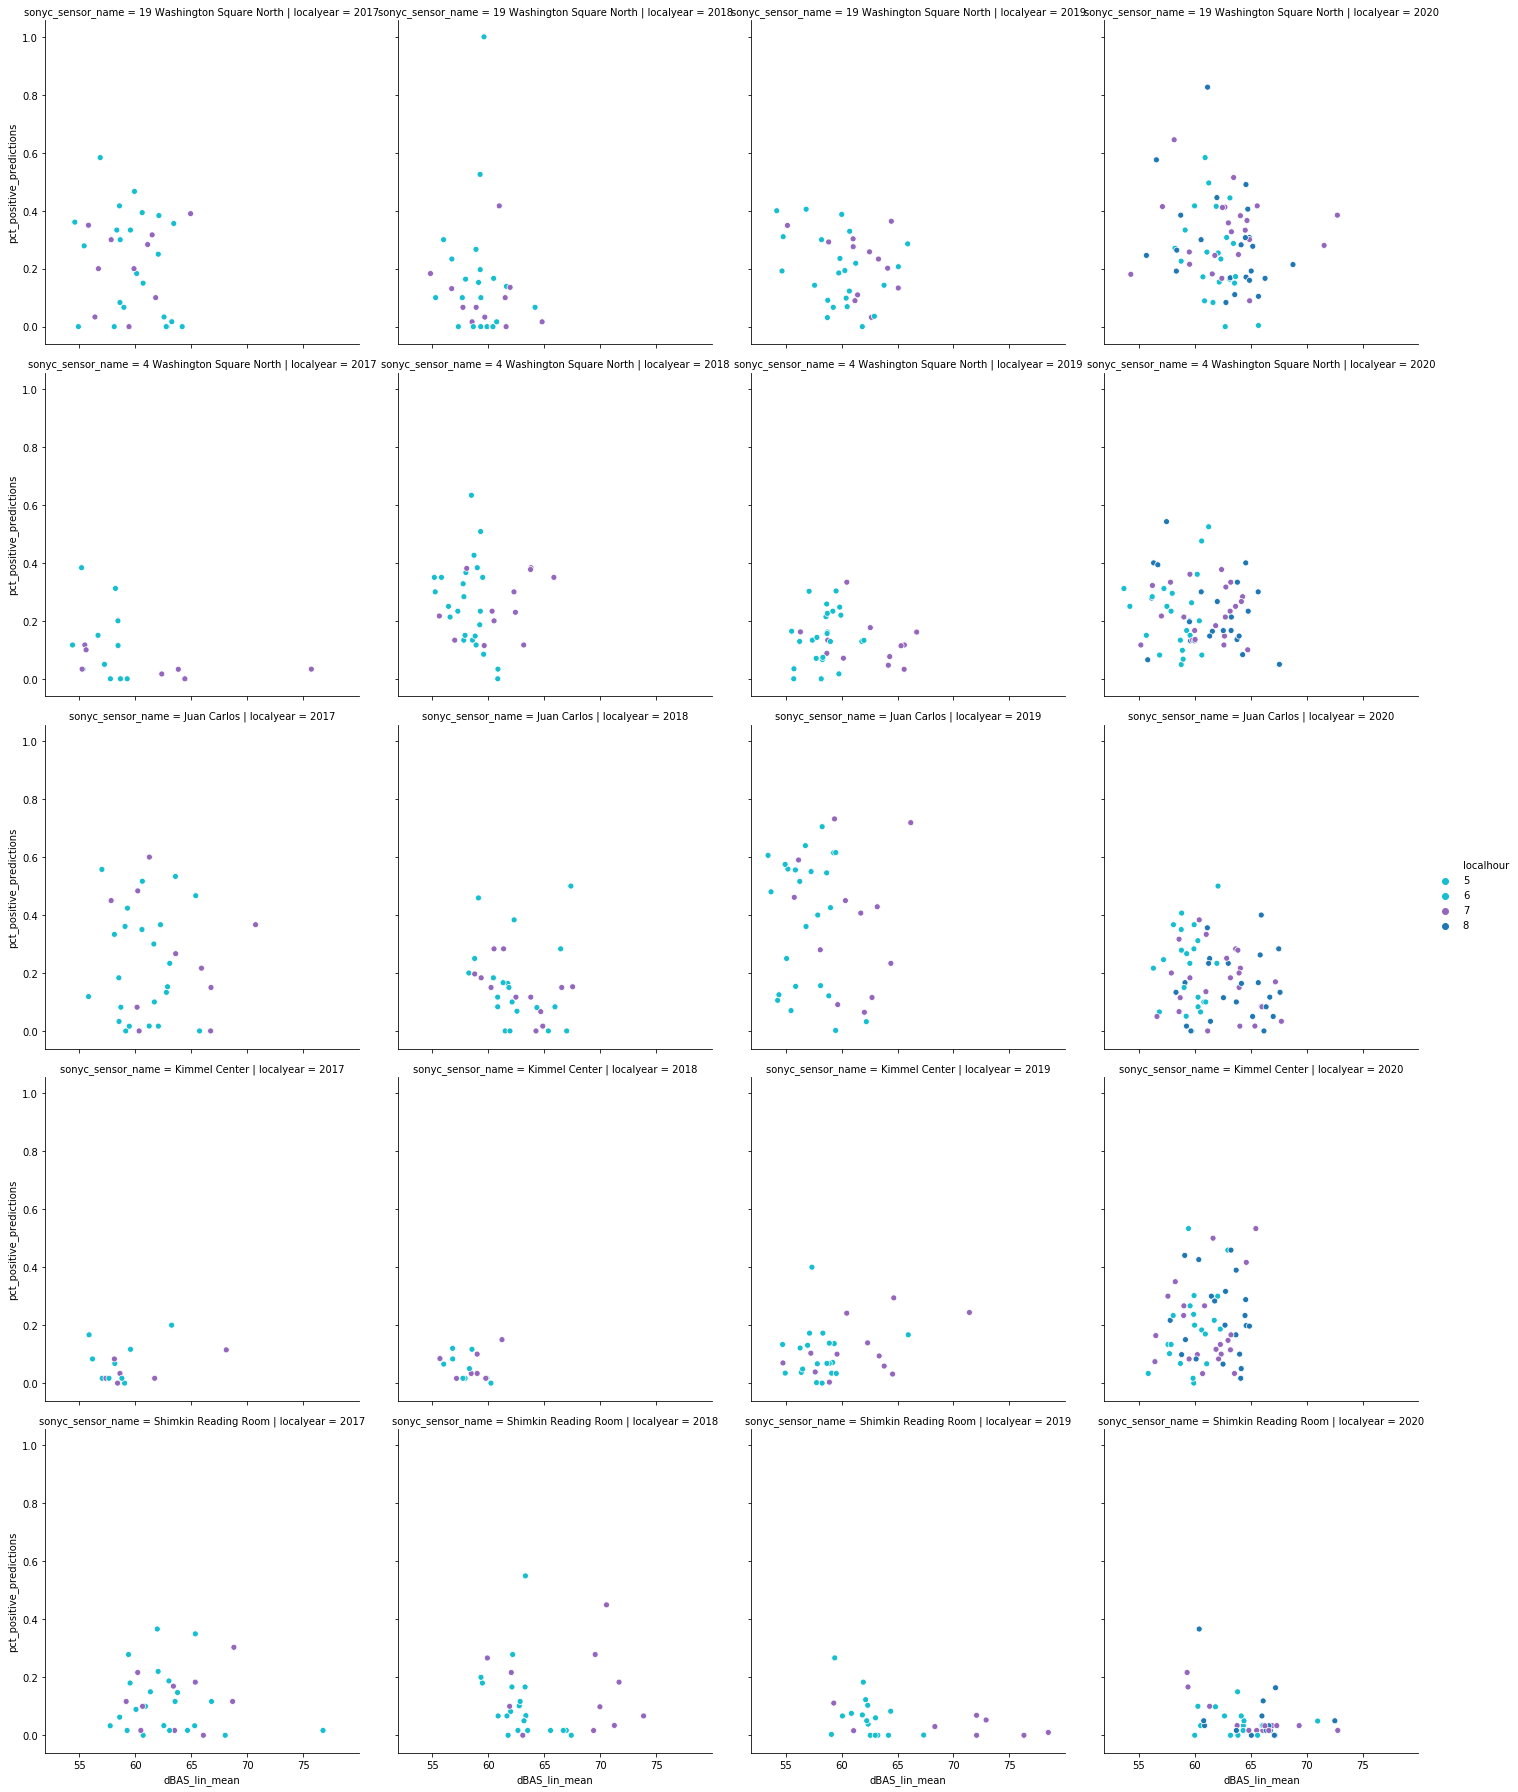

In [18]:
sns.relplot(x="dBAS_lin_mean", y="pct_positive_predictions",
            col="localyear", row="sonyc_sensor_name", hue = 'localhour', palette = 'tab10_r', 
            data=df[(df.localhour>=6) & (df.localhour<=8)][['sonyc_sensor_name', 'localyear',
                                                            'localmonth', 'localday', 'localhour',
                                                            'dBAS_lin_mean', 'pct_positive_predictions']]\
            .groupby(['sonyc_sensor_name', 'localyear', 'localmonth', 'localday', 'localhour']).mean().reset_index())